In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter
from tqdm import tqdm
import os

def sample(s, slen,  points=200):
    try:
        window_length = slen//15*2+1
        s=savgol_filter(s,  window_length, 2)
        s=savgol_filter(s,  window_length, 2)
        step = slen//points
        idx = [step*i for i in range(points)]
        return s[idx]
    except:
        return None

In [38]:
dic = {}
files = 
s = np.load('/Users/zinccat/Documents/挑战杯/arcs_final/2007-50本/《灯火阑珊》猴面包树.npz')["arr_0"]
slen = len(s)
out = sample(s, slen)

SyntaxError: invalid syntax (<ipython-input-38-5ef9dc314475>, line 2)

In [6]:
from glob import glob
PATH = '/Users/zinccat/Documents/挑战杯/arcs_final'
files = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.npz'))]

In [7]:
arcs = {}
for file in tqdm(files):
    filename = os.path.basename(file)
    year = int(file.split('/')[-2][:4])
    s = np.load(file)["arr_0"]
    slen = len(s)
    sampled_s = sample(s, slen)
    if sampled_s is None:
        print(year, filename)
        continue
    arcs[filename[:-4]] = (sampled_s, year)

 36%|███▌      | 315/869 [01:04<01:08,  8.06it/s]

2012 针锋对决825【一个腹黑叔受和兵痞子攻的故事】.npz


100%|██████████| 869/869 [02:18<00:00,  6.25it/s]


In [ ]:
arcs.keys()

In [2]:
import pickle

# with open('sampled.pickle', 'wb') as handle:
#     pickle.dump(arcs, handle)

In [5]:
with open('sampled.pickle', 'rb') as handle:
    arcs = pickle.load(handle)

In [33]:
s = np.load(files[313])["arr_0"]

In [35]:
files[313]

'/Users/zinccat/Documents/挑战杯/arcs_final/2012-50本/针锋对决825【一个腹黑叔受和兵痞子攻的故事】.npz'

In [6]:
files_list = list(arcs.keys())
year_list = np.array([arcs[x][1] for x in files_list])
arc_list = np.array([arcs[x][0] for x in files_list])

In [8]:
from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale

In [9]:
pca = PCA() #n_components=10)
pca.fit(arc_list)

PCA()

In [10]:
arcs_normalized = arc_list/np.linalg.norm(arc_list, axis=1).reshape(-1,1)

/Users/zinccat/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [11]:
pca.explained_variance_ratio_[:5]

array([0.62013858, 0.05273467, 0.0386039 , 0.03552485, 0.03258865])

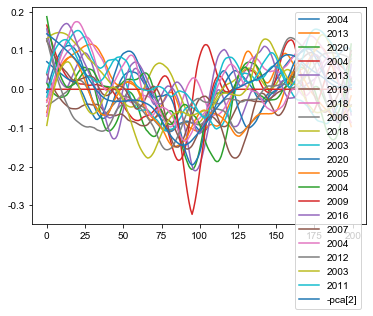

In [12]:
temp = np.argsort(np.dot(arcs_normalized, pca.components_[2]))
plt.rcParams["font.sans-serif"]=["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"]=False
for i in temp[:20]:
    plt.plot(arcs_normalized[i])
plt.plot(-pca.components_[2])
# leg = ['{}'.format(files_list[i]) for i in temp[:5]]
leg = ['{}'.format(year_list[i]) for i in temp[:20]]
leg.append('-pca[2]')
plt.legend(leg)
# plt.savefig('/Users/zinccat/Documents/挑战杯/pca_figure/-pca0.png', dpi=300)

In [15]:
summ = 0
print(len(pca.components_))
for i in range(len(pca.components_)):
    summ += np.dot(arcs_normalized[0], pca.components_[i])
    print(summ)

200
0.1370941198346473
0.17349326447515245
-0.06671916362781405
-0.041155536136941506
-0.182193561000427
4.068513988567113e-05
0.05270298575154762
-0.2892593317487729
0.3169182578202266
0.7084391214839711
0.5233443506217996
0.43604675973848506
0.652446256086384
0.40472959017064547
0.3683181116726206
0.205587756460072
0.39817338077933295
0.467672565681665
0.5201369925878316
0.4572383051406364
0.4405158079230824
0.43147616930928
0.42699934297514536
0.41306678090207555
0.4111044330858391
0.42454884693674033
0.4086595050243947
0.4063757518174014
0.393296106006497
0.3942714767413117
0.39677125822065096
0.3963201603932116
0.4049951831194196
0.40143537972472265
0.40077257005489086
0.4032650305622385
0.39849382762060676
0.39880215686388876
0.39709028862996765
0.38994564079198124
0.3924437124809343
0.3946057714603801
0.39879747036727736
0.4014971502154133
0.4015273561184039
0.40127653964994336
0.40213831039601494
0.4028288221757114
0.40067622643959705
0.3988238800994657
0.3978075838290614
0.396

In [94]:
idx = np.argsort(np.dot(arcs_normalized, pca.components_[2]))[:20]
unique, counts = np.unique(year_list[idx], return_counts=True)

In [95]:
unique

array([2003, 2004, 2005, 2006, 2007, 2009, 2011, 2012, 2013, 2016, 2018,
       2019, 2020])

In [96]:
counts

array([2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2])

In [78]:
temp

array([337, 441, 303, 738, 602, 179, 813, 521, 742,  41, 651, 754, 769,
       571, 744, 843, 367, 820, 678, 200])

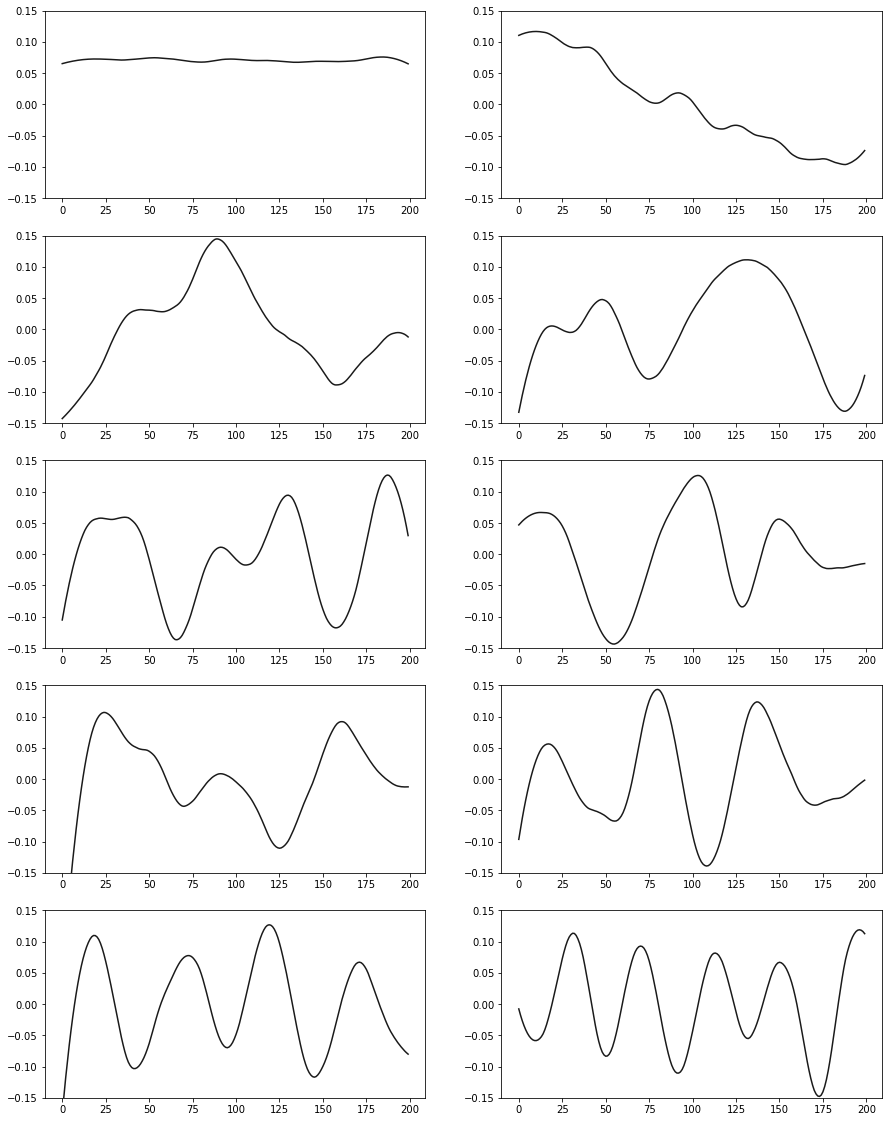

In [57]:
fig = plt.figure(figsize=(15,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(pca.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])

In [76]:
len(arc_list)

867